# Studio: Using Linear Regression to Predict Stock Prices

Many investors want to know how to predict stock prices. If we could predict the price of a share, we could know when the sell and when to buy and make quite a lot of money in the process. For this studio, you work for a small investing firm who wants you to see if you can use linear regression to predict the prices of MasterCard stock based on historical stock price data.

The dataset came from [Kaggle](https://www.kaggle.com/kalilurrahman/mastercard-stock-data-latest-and-updated) and the CSV is included with this notebook.

## Getting Started

We have imported some of the libraries you need and set up the dataframe for you. Before writing any code, read through the code cell below. We added a column to the dataframe called `'Converted Date'`. If you look at the output of using `.head()`, you will notice that the converted date is large numbers that don't seem to reflect what we know is a date. We set up this column for you to use your linear regression later because the linear regression model struggles to work with `datetime` values. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import datetime as dt


stocks_df = pd.read_csv("Mastercard_stock_history.csv")
stocks_df['Year'] = pd.to_numeric(stocks_df['Date'].str[:4])
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
stocks_df['Converted Date'] = stocks_df['Date'].map(dt.datetime.toordinal)

In [2]:
stocks_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Converted Date
0,2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.00,0.0,2006,732456
1,2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.00,0.0,2006,732457
2,2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.00,0.0,2006,732461
3,2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.00,0.0,2006,732462
4,2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.00,0.0,2006,732463
...,...,...,...,...,...,...,...,...,...,...
3867,2021-10-05,347.121403,348.130138,342.497241,342.776886,4724100,0.00,0.0,2021,738068
3868,2021-10-06,339.580960,348.439763,338.682072,348.250000,3712000,0.00,0.0,2021,738069
3869,2021-10-07,349.000000,357.899994,349.000000,353.910004,3209200,0.44,0.0,2021,738070
3870,2021-10-08,356.000000,360.369995,354.209991,354.959991,2336700,0.00,0.0,2021,738071


## Look at Correlations

Use both `pairplot()` and `heatmap()` to see if there are any correlations between the variables. You can use whatever variables you would like but when creating your pairplot, remember that the business issue we are trying to tackle is the prediction of stock prices.

/Users/dilnozahamraeva/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


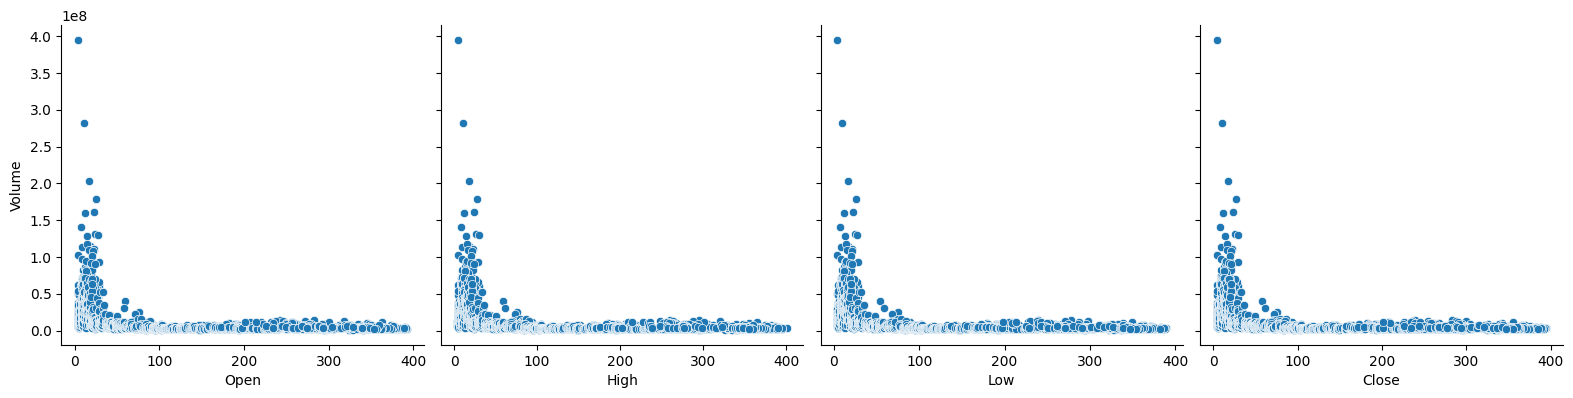

In [3]:
sns.pairplot(stocks_df, x_vars=['Open', 'High','Low', 'Close'], 
             y_vars='Volume', size=4, aspect=1, kind='scatter')

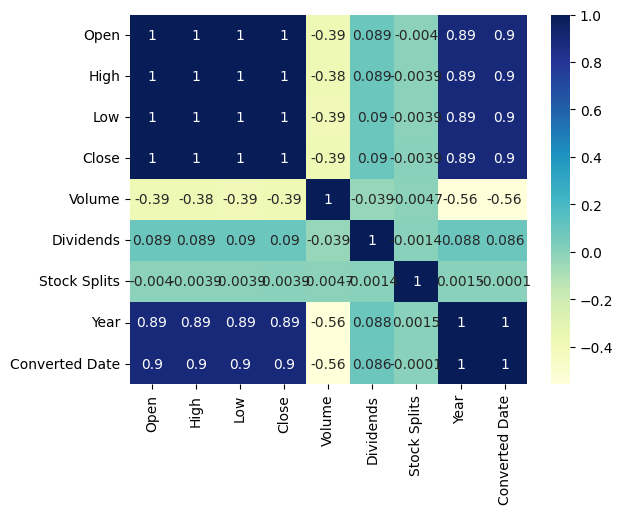

In [4]:
sns.heatmap(stocks_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Build Your Model

Now you are ready to build your model. First, assign your x- and y-variables.

In [18]:
X = stocks_df['Open']
y = stocks_df['Year']

Use the code cells below to create your testing and training sets and output two of your sets to ensure that everything is working.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [12]:
y_train

775     733582
1218    734224
1520    734661
1788    735052
1482    734606
         ...  
783     733595
962     733854
2697    736370
74      732565
2709    736389
Name: Converted Date, Length: 3097, dtype: int64

With your training and testing sets ready to go, create your linear regression model. Use `summary()` to see how the model went.

In [20]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()

lr.params

const    2009.660392
Open        0.037650
dtype: float64

Create a plot that shows your training sets and the linear regression line. Remember to use the values outputted above by `summary()` to make the line.

In [21]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Year   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                 1.209e+04
Date:                Thu, 08 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:32:16   Log-Likelihood:                -6539.4
No. Observations:                3097   AIC:                         1.308e+04
Df Residuals:                    3095   BIC:                         1.309e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2009.6604      0.051   3.98e+04      0.000    2009.561    2009.759
Open           0.0377      0.000    109.968      0.000       0.037       0.038
==============================================================================
Omnibus:                      760.425   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.500
Skew:                          -0.302   Prob(JB):                     2.86e-39
Kurtosis:                       1.995   Cond. No.                         208.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Error Terms

With your model built, time to look at the error terms. Use the code cell below to create the residuals with the predicted y-variable and the y training set.

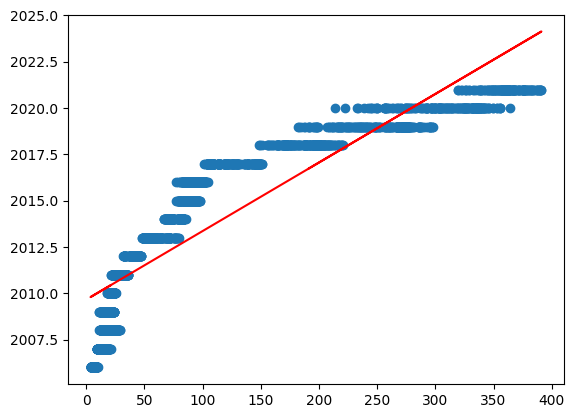

In [22]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 2009.66 + 0.037*X_train, 'r')
plt.show()

Now plot the residuals. Did you get a bell curve?

In [23]:
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

/Users/dilnozahamraeva/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


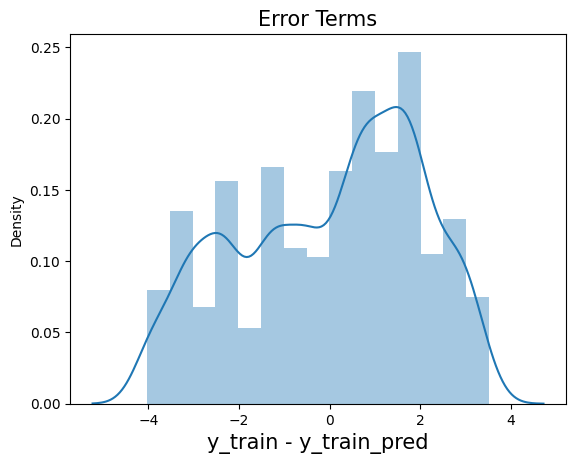

In [24]:
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Take some time to reflect on your linear regression model. Make note of your answers to the following questions.

1. When using a linear regression model to analyze financial data, getting an R-squared value above 0.7 is considered excellent. Was your R-squared value higher than this threshold?
2. Based on your analysis, would you recommend that linear regression be used to predict the price of Mastercard shares? 